In [14]:
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
sns.set_style("white")

In [5]:
workspace = Path("C:/Users/Kieran/Documents/LUNA23-ISMI-Group7")
# workspace = Path("D:/LUNA23-ISMI-Group7")
model_id = "20230529_22_multitask_model/fold0/"

Segmentation score (dice) = 0.7541071534156799
Nodule-type score (balanced accuracy) = 0.8621445856019357
Malignancy score (auc) = 0.9178289872650092
Overall score = 0.8629774283869085


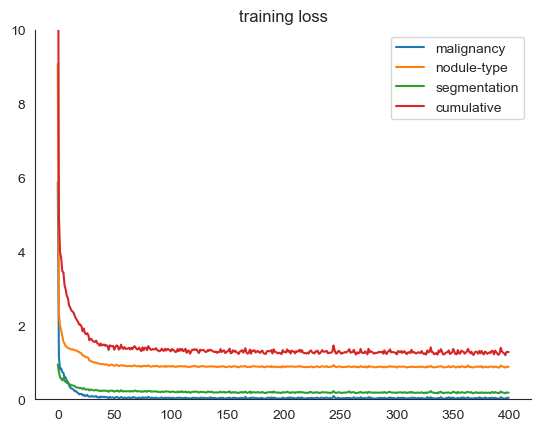

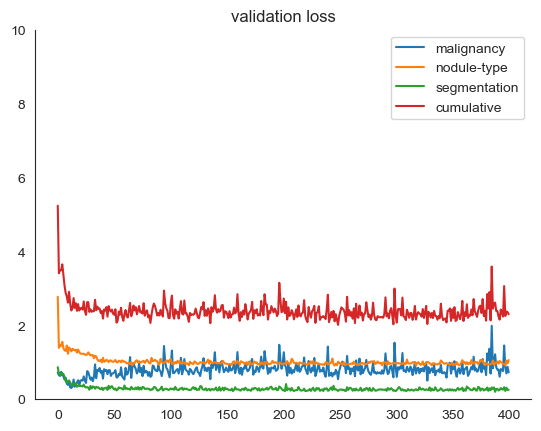

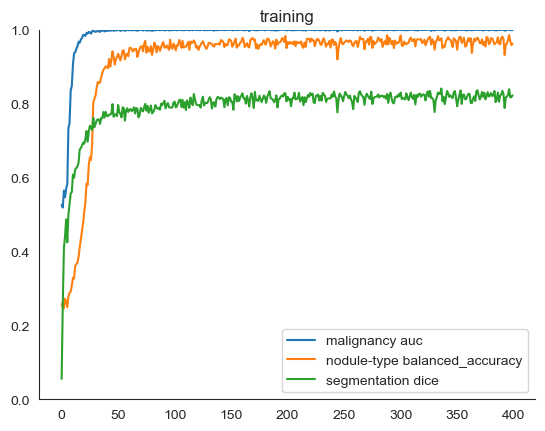

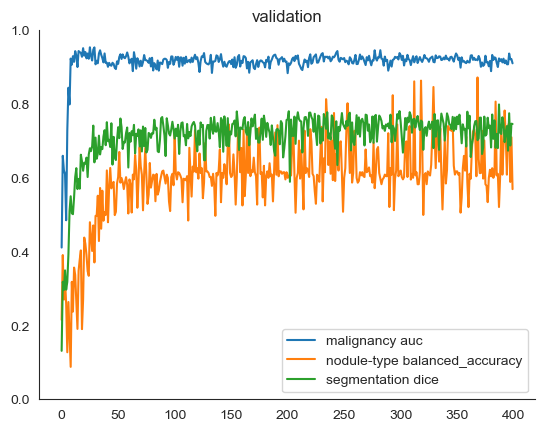

In [6]:
metrics = np.load(workspace / "results" / model_id / "metrics.npy", allow_pickle=True).item()

tasks = ["malignancy", "nodule-type", "segmentation", "cumulative"]
for mode in ["training", "validation"]:
    plt.figure()
    for task in tasks:
        plt.plot(
            [metrics[mode][i][task]["loss"] for i in range(len(metrics[mode]))],
            label=task,
        )
    plt.legend()
    plt.title(f"{mode} loss")
    plt.ylim([0, 10])
    sns.despine()

task_specific_metrics = {
    "segmentation": "dice",
    "malignancy": "auc",
    "nodule-type": "balanced_accuracy"
}

tasks = ["malignancy", "nodule-type", "segmentation"]
for mode in ["training", "validation"]:
    plt.figure()
    for task in tasks:
        plt.plot(
            [metrics[mode][i][task][task_specific_metrics[task]] for i in range(len(metrics[mode]))],
            label=f"{task} {task_specific_metrics[task]}",
        )
    plt.legend()
    plt.title(f"{mode}")
    plt.ylim([0, 1])
    sns.despine()
    
best_metrics = np.load(workspace / "results" / model_id / "best_metrics.npy", allow_pickle=True).item()
dice = best_metrics['segmentation']['dice']
balanced_accuracy = best_metrics['nodule-type']['balanced_accuracy']
auc = best_metrics['malignancy']['auc']
print("Segmentation score (dice) =", dice)
print("Nodule-type score (balanced accuracy) =", balanced_accuracy)
print("Malignancy score (auc) =", auc)
print("Overall score =", 0.5*auc + 0.25*dice + 0.25*balanced_accuracy)

In [10]:
# workspace = Path("C:/Users/Kieran/Documents/LUNA23-ISMI-Group7")
workspace = Path("D:/LUNA23-ISMI-Group7")
model_id = "20230528_20_multitask_model/fold1/"

Segmentation score (dice) = 0.8073064237833023
Nodule-type score (balanced accuracy) = 0.6509615384615385
Malignancy score (auc) = 0.9700854700854701
Overall score = 0.8496097256039453


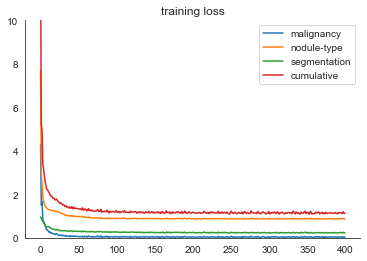

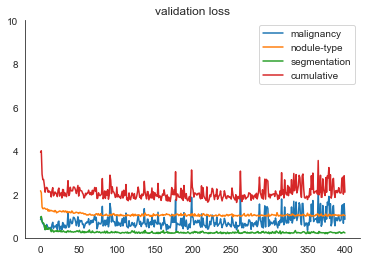

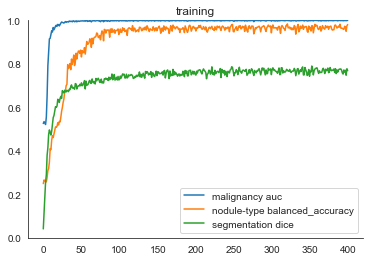

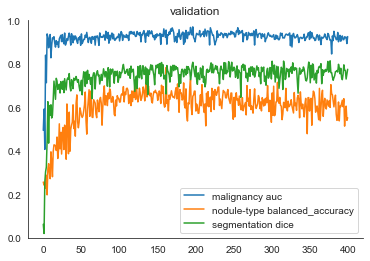

In [11]:
metrics = np.load(workspace / "results" / model_id / "metrics.npy", allow_pickle=True).item()

tasks = ["malignancy", "nodule-type", "segmentation", "cumulative"]
for mode in ["training", "validation"]:
    plt.figure()
    for task in tasks:
        plt.plot(
            [metrics[mode][i][task]["loss"] for i in range(len(metrics[mode]))],
            label=task,
        )
    plt.legend()
    plt.title(f"{mode} loss")
    plt.ylim([0, 10])
    sns.despine()

task_specific_metrics = {
    "segmentation": "dice",
    "malignancy": "auc",
    "nodule-type": "balanced_accuracy"
}

tasks = ["malignancy", "nodule-type", "segmentation"]
for mode in ["training", "validation"]:
    plt.figure()
    for task in tasks:
        plt.plot(
            [metrics[mode][i][task][task_specific_metrics[task]] for i in range(len(metrics[mode]))],
            label=f"{task} {task_specific_metrics[task]}",
        )
    plt.legend()
    plt.title(f"{mode}")
    plt.ylim([0, 1])
    sns.despine()
    
best_metrics = np.load(workspace / "results" / model_id / "best_metrics.npy", allow_pickle=True).item()
dice = best_metrics['segmentation']['dice']
balanced_accuracy = best_metrics['nodule-type']['balanced_accuracy']
auc = best_metrics['malignancy']['auc']
print("Segmentation score (dice) =", dice)
print("Nodule-type score (balanced accuracy) =", balanced_accuracy)
print("Malignancy score (auc) =", auc)
print("Overall score =", 0.5*auc + 0.25*dice + 0.25*balanced_accuracy)

In [16]:
# workspace = Path("C:/Users/Kieran/Documents/LUNA23-ISMI-Group7")
workspace = Path("D:/LUNA23-ISMI-Group7")
model_id = "20230529_22_multitask_model/fold0/"

Segmentation score (dice) = 0.7541071534156799
Nodule-type score (balanced accuracy) = 0.8621445856019357
Malignancy score (auc) = 0.9178289872650092
Overall score = 0.8629774283869085


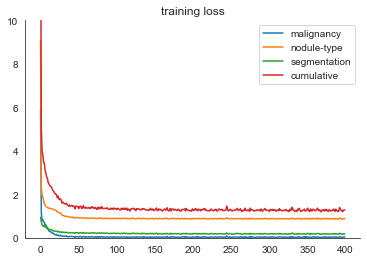

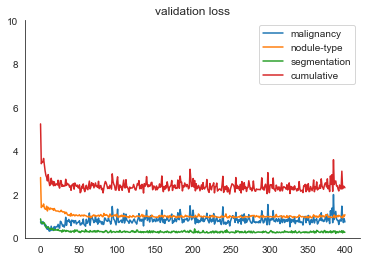

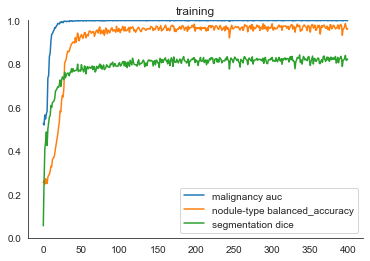

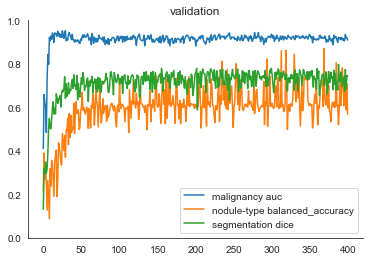

In [17]:
metrics = np.load(workspace / "results" / model_id / "metrics.npy", allow_pickle=True).item()

tasks = ["malignancy", "nodule-type", "segmentation", "cumulative"]
for mode in ["training", "validation"]:
    plt.figure()
    for task in tasks:
        plt.plot(
            [metrics[mode][i][task]["loss"] for i in range(len(metrics[mode]))],
            label=task,
        )
    plt.legend()
    plt.title(f"{mode} loss")
    plt.ylim([0, 10])
    sns.despine()

task_specific_metrics = {
    "segmentation": "dice",
    "malignancy": "auc",
    "nodule-type": "balanced_accuracy"
}

tasks = ["malignancy", "nodule-type", "segmentation"]
for mode in ["training", "validation"]:
    plt.figure()
    for task in tasks:
        plt.plot(
            [metrics[mode][i][task][task_specific_metrics[task]] for i in range(len(metrics[mode]))],
            label=f"{task} {task_specific_metrics[task]}",
        )
    plt.legend()
    plt.title(f"{mode}")
    plt.ylim([0, 1])
    sns.despine()
    
best_metrics = np.load(workspace / "results" / model_id / "best_metrics.npy", allow_pickle=True).item()
dice = best_metrics['segmentation']['dice']
balanced_accuracy = best_metrics['nodule-type']['balanced_accuracy']
auc = best_metrics['malignancy']['auc']
print("Segmentation score (dice) =", dice)
print("Nodule-type score (balanced accuracy) =", balanced_accuracy)
print("Malignancy score (auc) =", auc)
print("Overall score =", 0.5*auc + 0.25*dice + 0.25*balanced_accuracy)

In [24]:
labels = np.load(workspace / "results" / model_id / "labels.npy", allow_pickle=True).item()
predictions = np.load(workspace / "results" / model_id / "predictions.npy", allow_pickle=True).item()

In [25]:
predictions_nod = np.argmax(predictions['nodule-type'], axis=1)
predictions_nod

array([2, 3, 2, 2, 1, 3, 3, 3, 2, 3, 2, 2, 2, 3, 2, 3, 2, 2, 3, 2, 2, 2,
       2, 2, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 0,
       0, 2, 2, 2, 2, 2, 3, 0, 2, 1, 2, 2, 2, 3, 1, 1, 2, 2, 2, 3, 2, 2,
       3, 2, 3, 2, 2, 2, 3, 1, 2, 2, 2, 3, 2, 2, 0, 2, 2, 2, 1, 2, 2, 2,
       3, 2, 0, 2, 2, 3, 2, 3, 2, 3, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 0, 2, 2, 2, 2, 3, 2,
       1, 0, 2, 2, 2, 3, 2, 0, 2, 2, 0, 3, 2, 2, 2, 0], dtype=int64)

In [26]:
# confusion_matrix(labels['malignancy'], predictions['malignancy'])

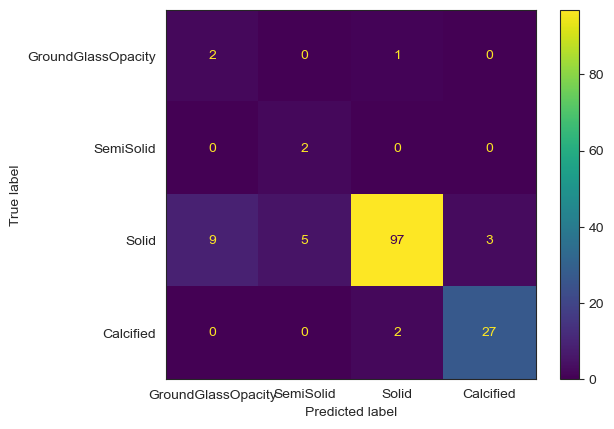

In [30]:
labels_names = ['GroundGlassOpacity', 'SemiSolid', 'Solid', 'Calcified']
labels_names = np.array(labels_names)
confusion_matrix(labels['nodule-type'], predictions_nod)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels = labels_names)
disp.plot()